In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Data used from Kaggle "House Prices: Advanced Regression Techniques"
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#Create a full set of both train & test data
df_full = df_train.append(df_test, ignore_index=True, sort=False)

In [4]:
df_full.shape

(2919, 81)

In [5]:
#Drop target from full set
df_full= df_full.drop(['SalePrice'], axis=1)
df_full.shape

(2919, 80)

In [7]:
#extracted labels for future usage
df_label = df_train['SalePrice']

In [8]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [34]:
df_train.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
452,453,60,RL,NaN,9303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,204000
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
1221,1222,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,134000


In [10]:
#Check null values in both training & test dataset
total = df_full.isnull().sum().sort_values(ascending=False)
percent = (total/len(df_full.values)) * 100

missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [11]:
#Get columns with more than 10 percent missing data for drop
missdata_to_del = [ind for ind in missing_data.index if missing_data.loc[ind,'Percent'] > 10]
print(missdata_to_del)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']


In [12]:
#Drop more missing data columns from both training & testing dataset 
df_train = df_train.drop(columns=missdata_to_del)
df_test = df_test.drop(columns=missdata_to_del)
print(df_train.shape)
print(df_test.shape)

(1460, 75)
(1459, 74)


In [13]:
#Fill missing values with mean - mode values of numerical - categorical columns
df_train_num_cols = df_train.select_dtypes(exclude='object').columns
df_train_obj_cols = df_train.select_dtypes(exclude=np.number).columns

df_train[df_train_num_cols] = df_train[df_train_num_cols].fillna(df_train[df_train_num_cols].mean())
df_train[df_train_obj_cols] = df_train[df_train_obj_cols].fillna(df_train[df_train_obj_cols].mode().iloc[0])

In [14]:
#Check missing values
df_train.isnull().sum().sum()

0

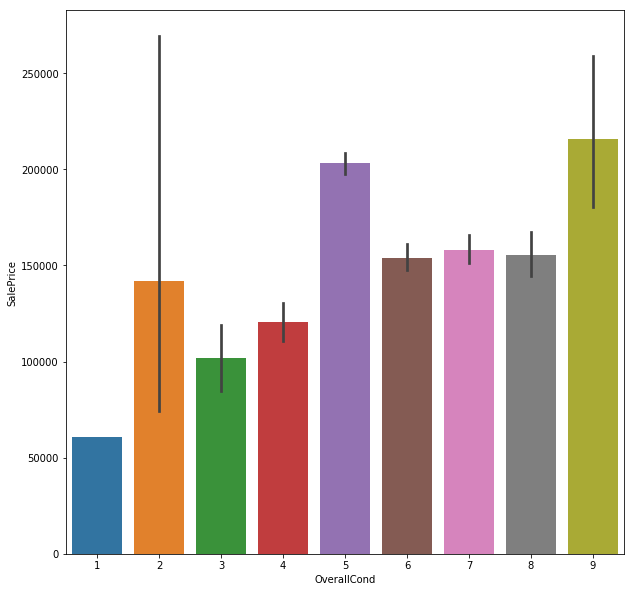

In [20]:
#Rates the overall condition of the house with SalePrice
data_for_bar = pd.concat([df_train['SalePrice'], df_train['OverallCond']], axis=1)
fig,ax = plt.subplots(figsize=(10,10))
fig = sns.barplot(x='OverallCond', y='SalePrice', data=data_for_bar)
plt.show()

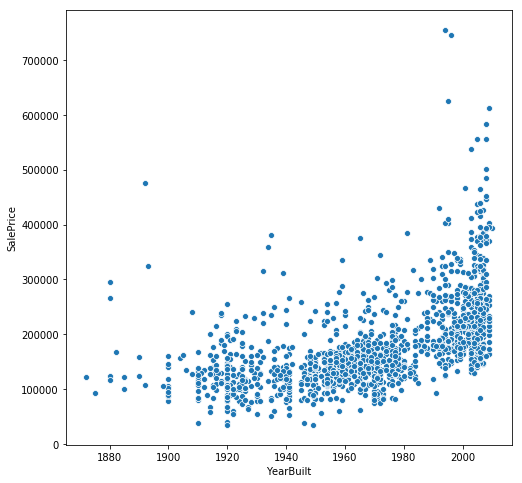

In [26]:
#Original construction date with SalePrice
plt.figure(figsize=(8,8))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train)
plt.show()

In [21]:
#Seperating both numerical & categorical variables
df_train_object = df_train.select_dtypes(exclude=np.number).columns
df_train_numeric = df_train.select_dtypes(exclude='object').columns
print(df_train_object)
print(df_train_numeric)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars'

In [23]:
#Checking unique values in categorical columns
categ_unique = []
categ_unique_col=[]
for col in df_train_object:
    categ_unique_col.append(col)
    categ_unique.append(df_train[col].unique())
df_train_categ = pd.DataFrame({'Unique':list(categ_unique)}, index=categ_unique_col)
df_train_categ.sample(5)

,Unique
Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."
GarageQual,"[TA, Fa, Gd, Ex, Po]"
Exterior1st,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ..."
PavedDrive,"[Y, N, P]"
Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."


In [25]:
#Seperating numerical columns with their type
train_squarefeet = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea']
train_datetime = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
train_ordinal = ['OverallQual','OverallCond']
train_continuous = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']

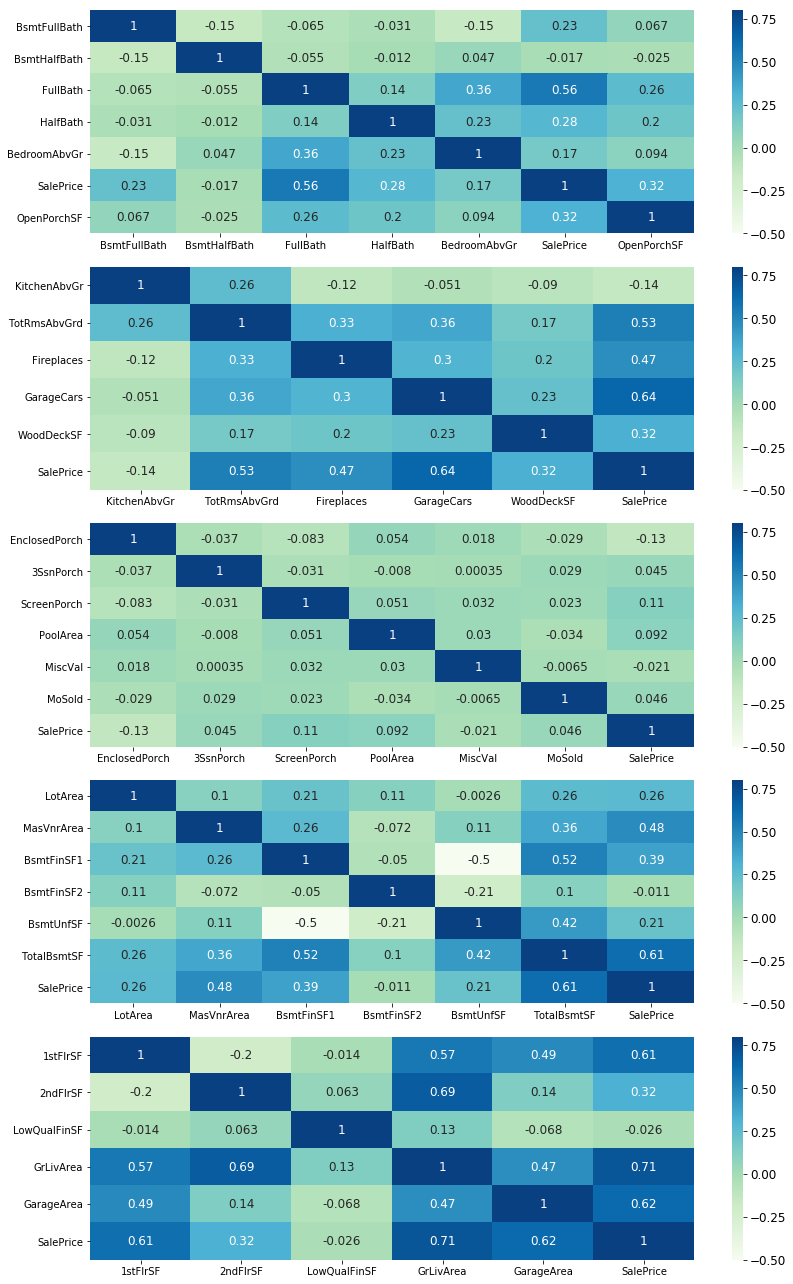

In [26]:
#Plotting continuous training data as heatmap
var1_continuous = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice','OpenPorchSF']
var2_continuous = ['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','SalePrice']
var3_continuous = ['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','SalePrice']
var4_continuous = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']
var5_continuous = ['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','SalePrice']

corr_mat1 = df_train[var1_continuous].corr()
corr_mat2 = df_train[var2_continuous].corr()
corr_mat3 = df_train[var3_continuous].corr()
corr_mat4 = df_train[var4_continuous].corr()
corr_mat5 = df_train[var5_continuous].corr()
fig,ax = plt.subplots(5,1,figsize=(12,18))
plt.rcParams.update({'font.size':12})
sns.heatmap(corr_mat1, vmin=-0.5, vmax=0.8, annot=True, cmap=plt.cm.GnBu, ax=ax[0])
sns.heatmap(corr_mat2, vmin=-0.5, vmax=0.8, annot=True, cmap=plt.cm.GnBu, ax=ax[1])
sns.heatmap(corr_mat3, vmin=-0.5, vmax=0.8, annot=True, cmap=plt.cm.GnBu, ax=ax[2])
sns.heatmap(corr_mat4, vmin=-0.5, vmax=0.8, annot=True, cmap=plt.cm.GnBu, ax=ax[3])
sns.heatmap(corr_mat5, vmin=-0.5, vmax=0.8, annot=True, cmap=plt.cm.GnBu, ax=ax[4])
plt.tight_layout()

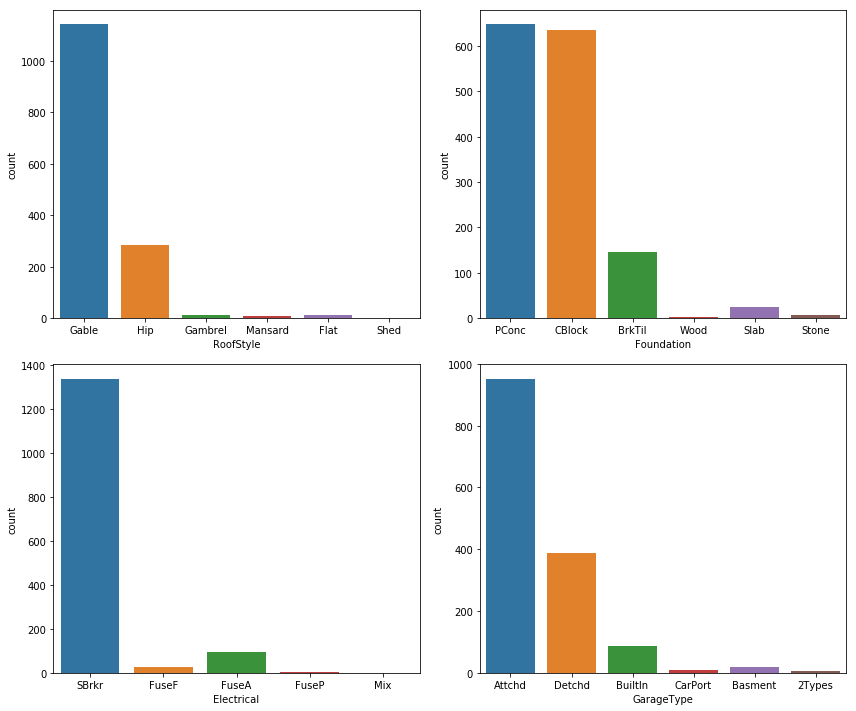

In [37]:
fig,ax = plt.subplots(2,2, figsize=(12,10))
sns.countplot(x='RoofStyle', data=df_train, ax=ax[0,0])
sns.countplot(x='Foundation', data=df_train, ax=ax[0,1])
sns.countplot(x='Electrical', data=df_train, ax=ax[1,0])
sns.countplot(x='GarageType', data=df_train, ax=ax[1,1])
plt.tight_layout()

In [33]:
target = df_train.SalePrice
df_train.drop(columns='SalePrice', inplace=True)

In [34]:
#converting categorical values to numeric, selecting low cardinal columns < 10
df_train_cardinal = [col for col in df_train.select_dtypes(exclude=np.number).columns if df_train[col].nunique() < 10]
df_train_high_cardinal = [col for col in df_train.select_dtypes(exclude=np.number).columns if df_train[col].nunique() > 10]
train_predictors = df_train[df_train_cardinal]
test_predictors = df_test[df_train_cardinal]
print(df_train_cardinal)
print(df_train_high_cardinal)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [35]:
#Using one-hot-encoding
hot_encoded_train = pd.get_dummies(train_predictors)
hot_encoded_test = pd.get_dummies(test_predictors)

In [36]:
#Algining both train & test dataset for matching columns
final_train, final_test = hot_encoded_train.align(hot_encoded_test, join='left',axis=1)
print(final_train.shape)
print(final_test.shape)

(1460, 178)
(1459, 178)


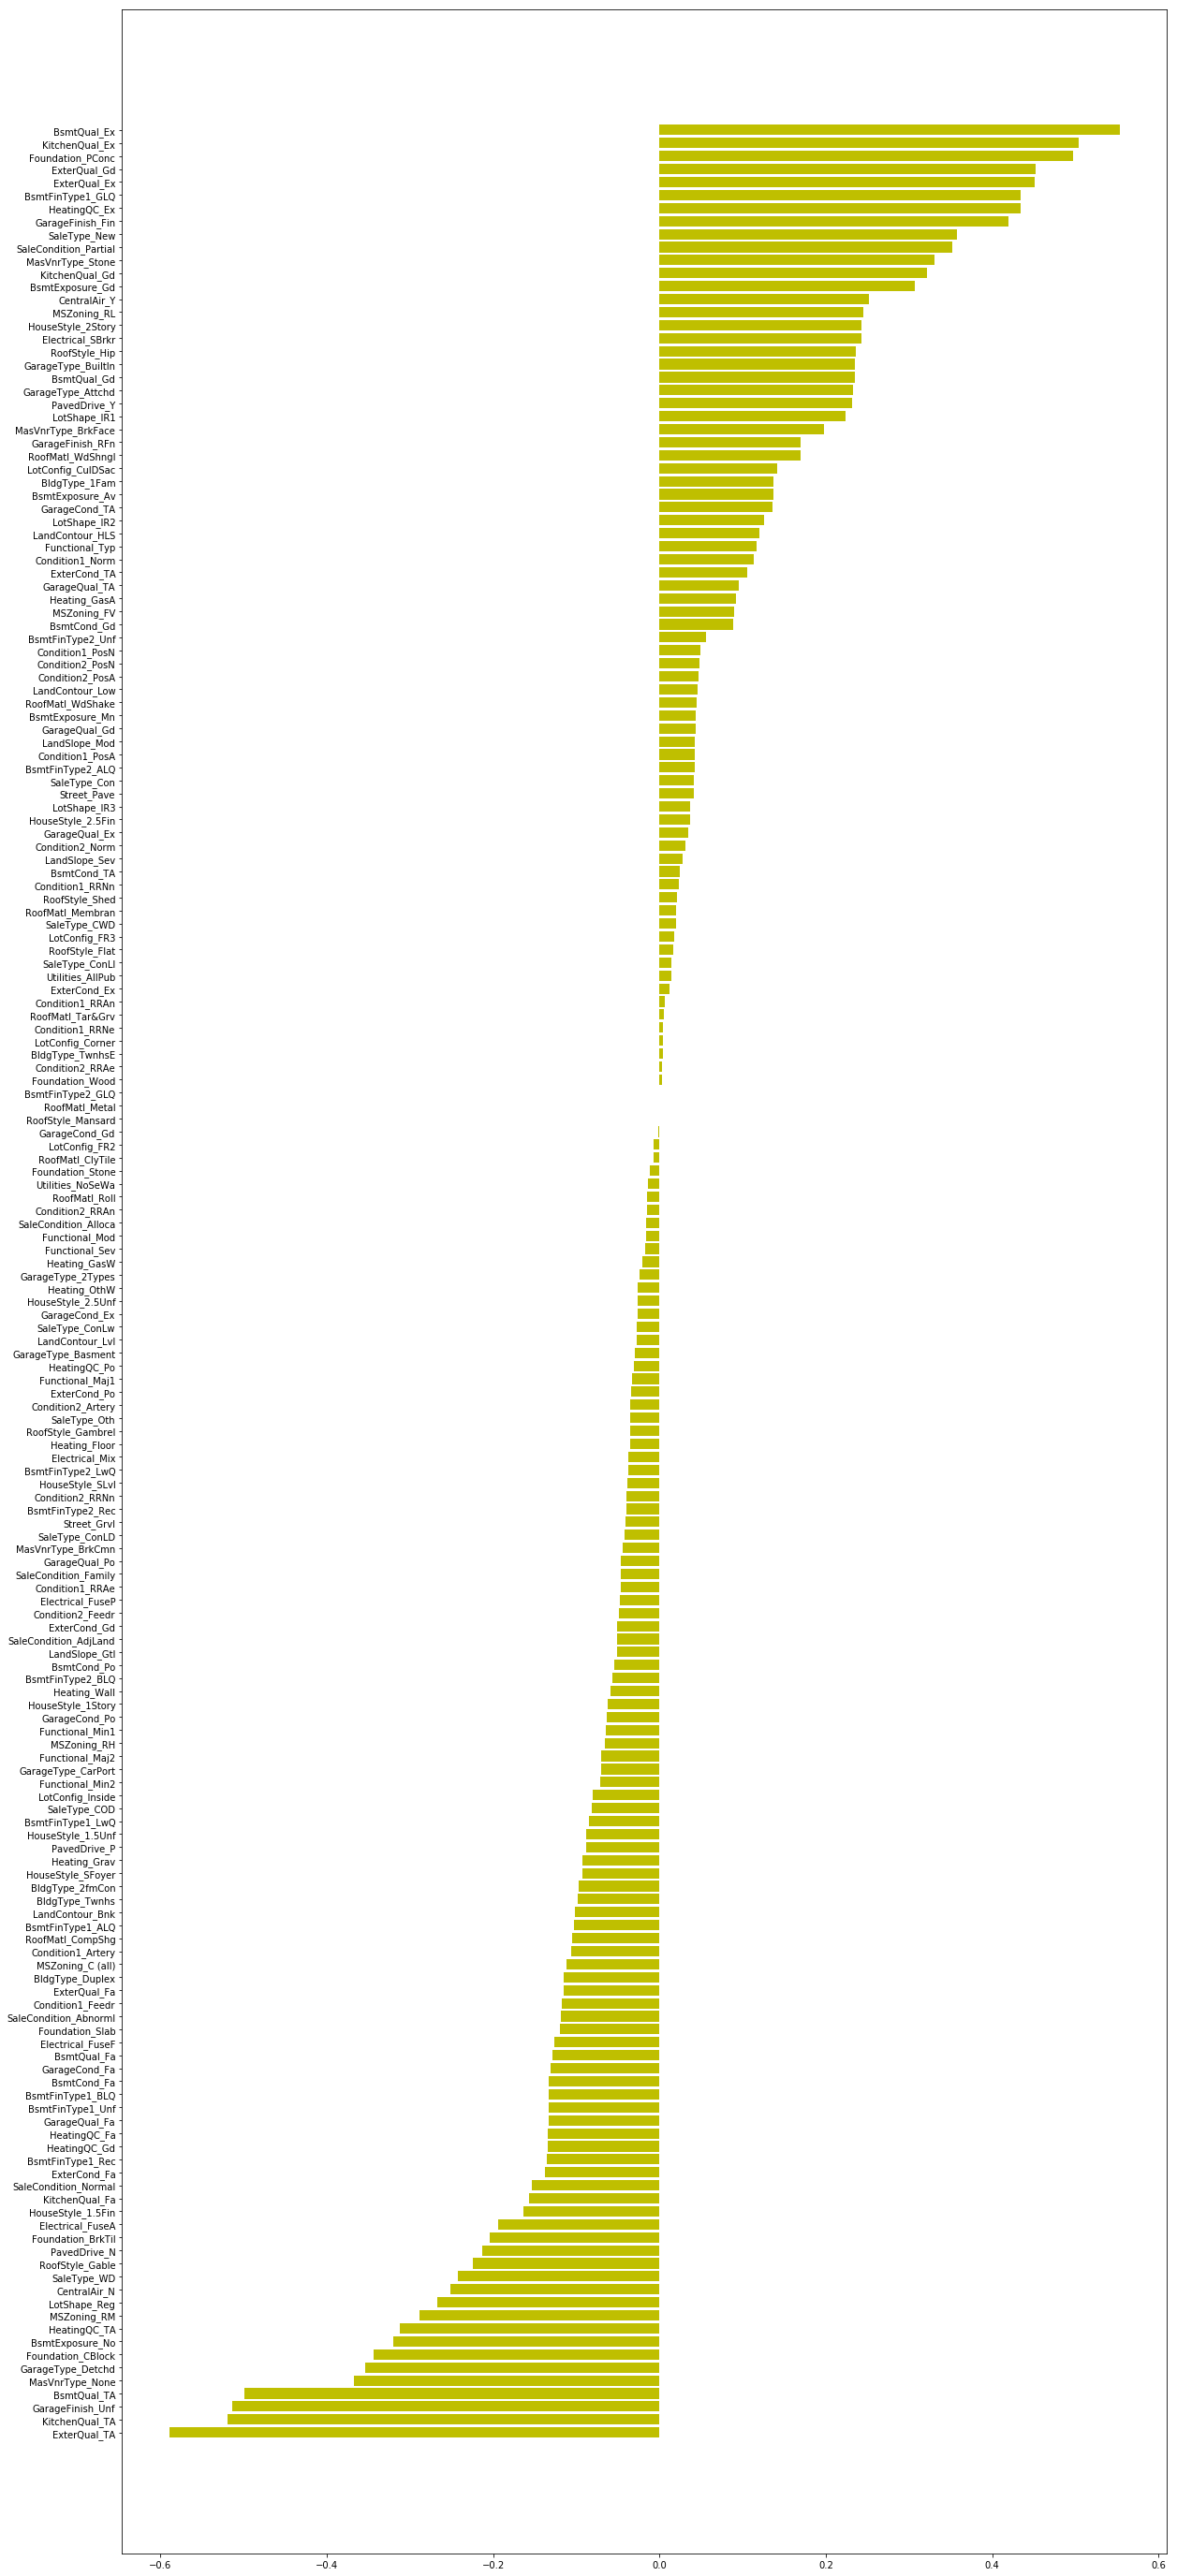

In [45]:
#Checking correleation coefficient for newly created categorical columns after encoding
label=[]
values=[]

for col in final_train.columns:
    label.append(col)
    values.append(np.corrcoef(final_train[col].values, target.values)[0,1])
    
df_1 = pd.DataFrame({'corr_labels':label, 'corr_values':values})
df_1 = df_1.sort_values(by='corr_values')

ind = np.arange(len(label))
fig,ax = plt.subplots(figsize=(20,50))
rect = ax.barh(ind, df_1.corr_values.values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(df_1.corr_labels.values)
plt.show()

In [20]:
print(f'Total numerical columns: {len(train_squarefeet+train_datetime+train_ordinal+train_continuous)}')
print('Total numerical columns in training set:', df_train_numeric.shape[0])

Total numerical columns: 34
Total numerical columns in training set: 37


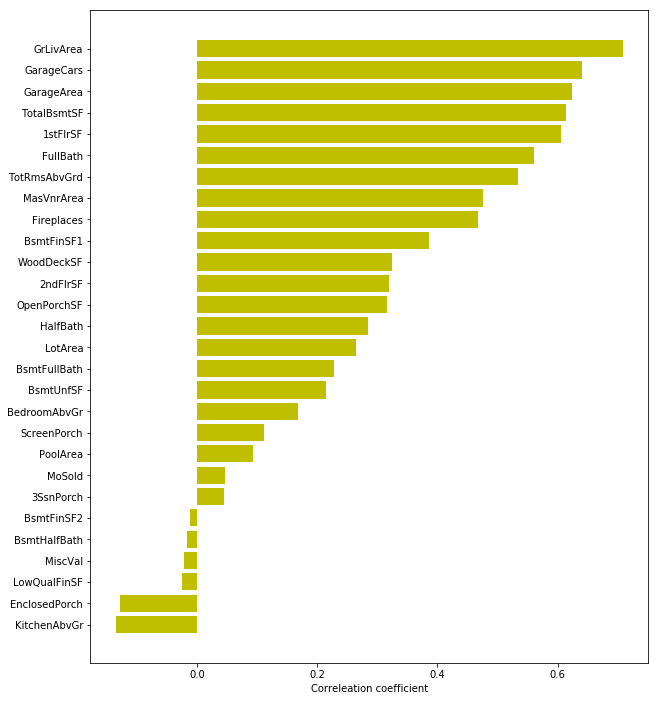

In [12]:
#Checking correlation for numerical columns
df_numeric = train_squarefeet + train_continuous

labels=[]
values=[]

for col in df_numeric:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train.SalePrice.values)[0,1])

corr_df = pd.DataFrame({'corr_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind =  np.arange(len(labels))
fig,ax = plt.subplots(figsize=(10,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.corr_labels.values)
ax.set_xlabel('Correleation coefficient')
plt.show()